In [23]:
import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': 'KFwmHTp1Qbyhr8p3FPUK8tfzw2DouD6X9IFYAxhqUvD9',
    'service_id': 'iam-ServiceId-9a91f062-3319-4553-ae5d-7e80afa896ad',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token'}
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': '0s-JWmaDBwiSd_yWJqenoKRBfTVU5Rgkz31CDT5WgoWQ',
    'service_id': '22e3b946-6154-4032-8e8f-7cfb0b429602',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token'}

configuration_name = 'os_22e3b946615440328e8f7cfb0b429602_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [49]:
clickprod_path = cos.url('CLICKAGGPROD', 'click')
print(clickprod_path)
clickprod_df = sqlContext.read.parquet(clickprod_path)
clickprod_df.registerTempTable("ClickAggProd")

cos://click.os_22e3b946615440328e8f7cfb0b429602_configs/CLICKAGGPROD


In [55]:
print(clickprod_df.printSchema())
print("count = ", clickprod_df.count())
clickprod_df.take(2)

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- count: integer (nullable = true)
 |-- sales: double (nullable = true)

None
count =  914
[Row(YEAR=2018, MONTH=1, DAY=16, HOUR=5, time_stamp='2018-01-16T05:05:46', product_category='Toiletries', product_name='Baby wash', count=3, sales=23.97), Row(YEAR=2018, MONTH=1, DAY=16, HOUR=5, time_stamp='2018-01-16T05:06:20', product_category='Medical Products', product_name='Diapers', count=8, sales=80.0)]


In [56]:
#sqlContext.sql("select max(time_stamp), count(*) from clickstream").toPandas()
sqlContext.sql("select max(time_stamp), count(*) from ClickAggProd").show()

+-------------------+--------+
|    max(time_stamp)|count(1)|
+-------------------+--------+
|2018-01-17T05:17:50|     914|
+-------------------+--------+



In [42]:
#!pip install --user --upgrade pixiedust
import pixiedust

In [57]:
display(clickprod_df)

In [64]:
query = """
select HOUR, COUNT(*) as count, SUM(sales) as sales
  from ClickAggProd
 where YEAR = 2018 and MONTH = 1 and DAY = 16
 group by HOUR
"""
query_df_1 = sqlContext.sql(query)
display(query_df_1)
display(query_df_1)

In [28]:
path_2 = cos.url('CLICKSTREAM', 'click')
print(path_2)

df_data_1 = sqlContext.read.parquet(path_2)
#print(example1_df.printSchema())
df_data_1.take(2)

cos://click.os_22e3b946615440328e8f7cfb0b429602_configs/CLICKSTREAM


[Row(YEAR=2018, MONTH=1, DAY=15, HOUR=7, time_stamp='2018-01-15T07:27:16', customer_id=10535.0, click_event_type='browsing', total_price_of_basket=0.0, total_number_of_items_in_basket=0.0, total_number_of_distinct_items_in_basket=0.0, session_duration=0.0, product_name=None, product_category=None, product_price=0.0),
 Row(YEAR=2018, MONTH=1, DAY=15, HOUR=7, time_stamp='2018-01-15T07:27:16', customer_id=10846.0, click_event_type='browsing', total_price_of_basket=0.0, total_number_of_items_in_basket=0.0, total_number_of_distinct_items_in_basket=0.0, session_duration=0.0, product_name=None, product_category=None, product_price=0.0)]

In [29]:
df_data_1.registerTempTable("CLICKSTREAM")
#import pandas as pd
#sqlContext.sql("select max(time_stamp), count(*) from clickstream").toPandas()
df_data_2 = sqlContext.sql("select max(time_stamp), count(*) from clickstream")
df_data_2.show(10)

+-------------------+--------+
|    max(time_stamp)|count(1)|
+-------------------+--------+
|2018-01-15T07:37:21|   72871|
+-------------------+--------+



In [30]:
sqlContext.sql("select distinct(click_event_type) from clickstream").show(100)

+--------------------+
|    click_event_type|
+--------------------+
|logout_with_purchase|
|               login|
|         add_to_cart|
|            browsing|
|logout_without_pu...|
|            checkout|
+--------------------+



In [31]:
query = """
select customer_id, int(sum(total_price_of_basket)) sum_basket, int(sum(product_price)) sum_price 
  from clickstream
 group by customer_id
"""
sqlContext.sql(query).show(1000)

+-----------+----------+---------+
|customer_id|sum_basket|sum_price|
+-----------+----------+---------+
|    11766.0|       845|       75|
|    12467.0|       381|       35|
|    11112.0|      3394|      242|
|    10561.0|      4440|      249|
|    10625.0|      1379|       90|
|    11028.0|       558|       37|
|    10831.0|       356|       25|
|    12275.0|       410|       37|
|    11772.0|       472|       37|
|    13918.0|       409|       37|
|    12493.0|       200|       22|
|    13973.0|      5954|      205|
|    10930.0|      3505|      175|
|    12671.0|       197|       37|
|    14285.0|      3036|      141|
|    14521.0|       898|       67|
|    13649.0|         3|        1|
|    13937.0|       634|       37|
|    15145.0|      1353|      127|
|    10690.0|       146|       16|
|    14760.0|      2491|      201|
|    10130.0|      3958|      293|
|    10345.0|      2162|      171|
|    13811.0|       247|       35|
|    13930.0|        44|        2|
|    10551.0|       

In [32]:
#!pip install --user --upgrade pixiedust
import pixiedust
display(df_data_1)

YEAR,MONTH,DAY,HOUR,time_stamp,customer_id,click_event_type,total_price_of_basket,total_number_of_items_in_basket,total_number_of_distinct_items_in_basket,session_duration,product_name,product_category,product_price
2018,1,15,7,2018-01-15T07:27:16,10535.0,browsing,0.0,0.0,0.0,0.0,None,None,0.0
2018,1,15,7,2018-01-15T07:27:16,10846.0,browsing,0.0,0.0,0.0,0.0,None,None,0.0
2018,1,15,7,2018-01-15T07:27:16,15503.0,browsing,0.0,0.0,0.0,0.0,None,None,0.0
2018,1,15,7,2018-01-15T07:27:16,12527.0,add_to_cart,14.950000000000001,5.0,1.0,0.0,Club Soda,Drinks,2.99
2018,1,15,7,2018-01-15T07:27:16,14979.0,browsing,0.0,0.0,0.0,0.0,None,None,0.0
2018,1,15,7,2018-01-15T07:27:16,10059.0,add_to_cart,4.95,5.0,1.0,0.0,Popcorn,Food,0.99
2018,1,15,7,2018-01-15T07:27:16,13782.0,add_to_cart,57.910000000000004,9.0,2.0,0.0,Condiments,Food,5.99
2018,1,15,7,2018-01-15T07:27:16,11492.0,add_to_cart,34.879999999999995,2.0,2.0,0.0,Lotion,Beauty Products,3.89
2018,1,15,7,2018-01-15T07:27:16,13655.0,add_to_cart,21.32,4.0,1.0,0.0,Baby Food,Food,5.33
2018,1,15,7,2018-01-15T07:27:16,14741.0,browsing,0.0,0.0,0.0,0.0,None,None,0.0



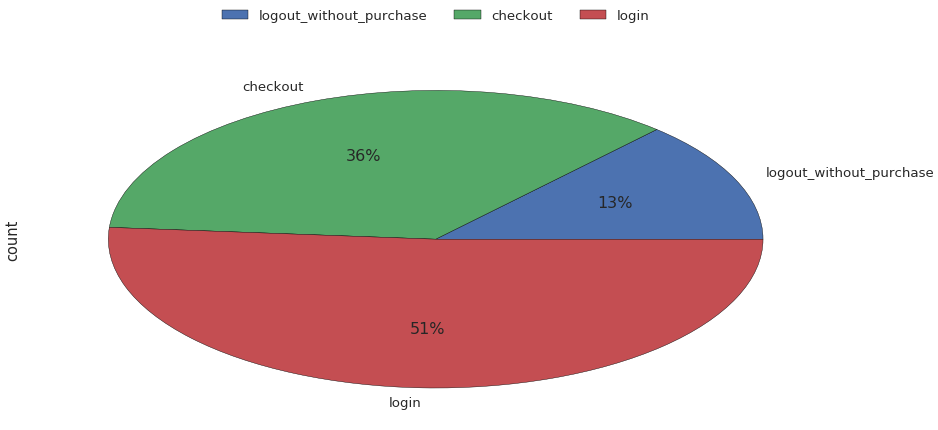

In [33]:
query = """
select click_event_type, count(*) count
  from clickstream
 where click_event_type in ('checkout','logout_without_purchase', 'login')
 group by click_event_type
"""
df_data_3 = sqlContext.sql(query)
display(df_data_3)

In [37]:
query = """
select concat(day, hour) as hour, sum(session_duration) duration
  from clickstream
 where click_event_type in ('checkout','logout_without_purchase')
 group by day, hour
"""
df_data_4 = sqlContext.sql(query)
display(df_data_4)

hour,duration
156,939330.0
157,1523373.0


In [ ]:
df_data_2 = example1_df.groupBy('click_event_type','product_category','product_name').agg({"product_name": "count"}).orderBy('click_event_type','product_category','product_name')
df_data_2.show(100)

In [ ]:
#display(df_data_2)

https://dataplatform.ibm.com/exchange/public/entry/view/5ad1c820f57809ddec9a040e37b2bd55
example1_df.registerTempTable("world_bank")
temp_df =  sqlContext.sql("select * from world_bank")

print type(temp_df)
print "*" * 20
print temp_df

import pandas as pd
sqlContext.sql("select id, borrower from world_bank limit 2").toPandas()

query = """
select
    regionname ,
    count(*) as project_count
from world_bank
group by regionname 
order by count(*) desc
"""

sqlContext.sql(query).toPandas()

query = """

select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by count(*) desc) table_alias
limit 2
"""

sqlContext.sql(query).toPandas()

